In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('breast-cancer-wisconsin-data.csv')

In [2]:
#viewing the top rows of our data
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [3]:
#Getting the statistics of our data
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [4]:
#getting the information of null values in our data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Based on the above information we can see we don't have any null values

In [6]:
#Dropping ID and Unnamed columns from our dataframe
df = df.drop(['id', 'Unnamed: 32'], axis=1)

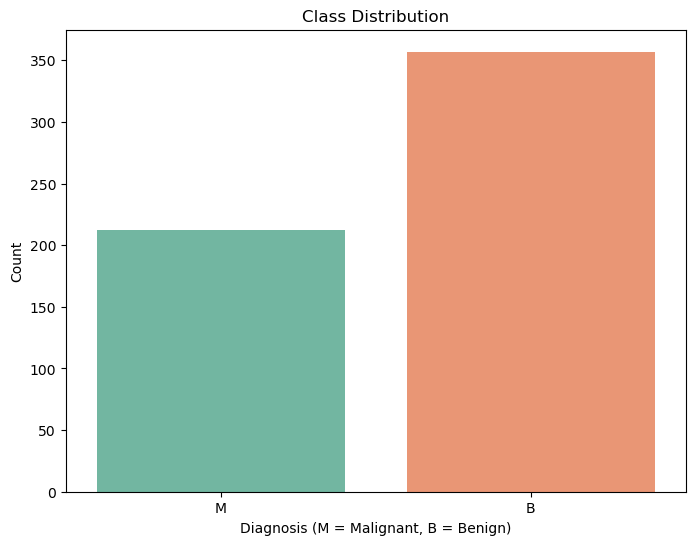

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of benign and malignant cases
class_counts = df['diagnosis'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Count')
plt.show()

C:\Users\balun\AppData\Local\Temp\ipykernel_9928\2838073760.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


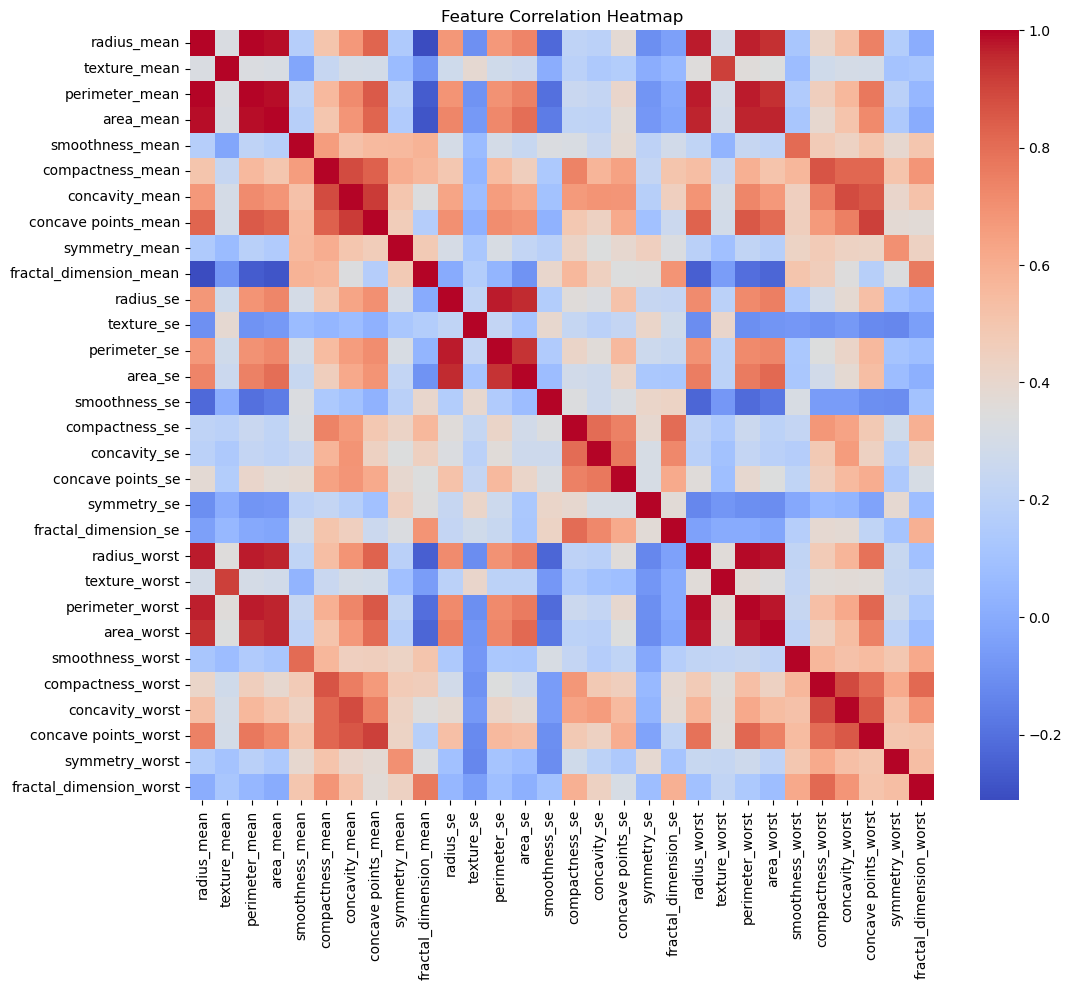

In [8]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

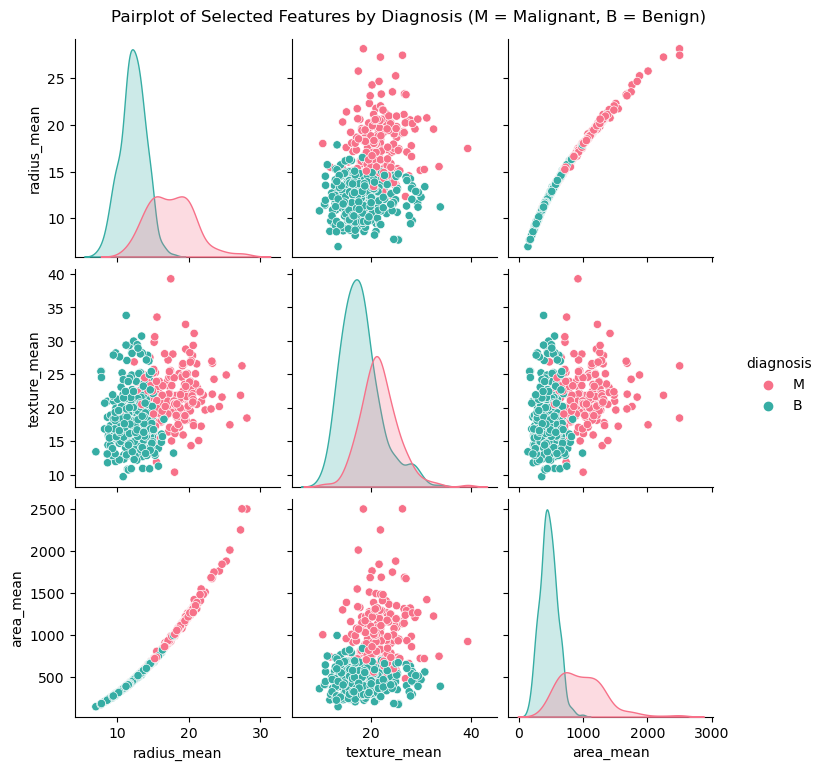

In [9]:
# Create a pairplot
selected_features = ['radius_mean', 'texture_mean', 'area_mean', 'diagnosis']

# Create a pair plot for the selected features
sns.pairplot(df[selected_features], hue='diagnosis', palette='husl')
plt.suptitle('Pairplot of Selected Features by Diagnosis (M = Malignant, B = Benign)', y=1.02)
plt.show()

In [10]:
# Encodint the 'diagnosis' column 'M' for malignant and 'B' for benign
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [11]:
from sklearn.model_selection import train_test_split

# Separate the target variable ('diagnosis') from the features
X = df.drop('diagnosis', axis=1)  # Features
y = df['diagnosis']  # Target variable

# Split the data into training 70% and testing 30% sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (398, 30)
X_test shape: (171, 30)
y_train shape: (398,)
y_test shape: (171,)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Train the model using the training dataset
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Report the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.9707602339181286
Precision: 0.9833333333333333
Recall: 0.9365079365079365
F1-Score: 0.9593495934959351


C:\Users\balun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
import numpy as np

# Custom Logistic Regression Implementation

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def cost_function(y, y_pred):
    m = len(y)
    return (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Gradient Descent
def gradient_descent(X, y, alpha, epochs):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for _ in range(epochs):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        gradient = np.dot(X.T, (y_pred - y)) / m
        theta -= alpha * gradient
        cost = cost_function(y, y_pred)
        cost_history.append(cost)

    return theta, cost_history

# Add a column of ones for the bias term in the feature matrix
X_train_custom = np.column_stack((np.ones(len(X_train)), X_train))
X_test_custom = np.column_stack((np.ones(len(X_test)), X_test))

# Train the custom Logistic Regression model
alpha = 0.01
epochs = 1000
theta_custom, _ = gradient_descent(X_train_custom, y_train, alpha, epochs)

# Predict on the test dataset using the custom model
y_pred_custom = sigmoid(np.dot(X_test_custom, theta_custom))
y_pred_custom = np.round(y_pred_custom)

# Calculate custom model evaluation metrics
accuracy_custom = accuracy_score(y_test, y_pred_custom)
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)
f1_custom = f1_score(y_test, y_pred_custom)

# Scikit-Learn Logistic Regression Implementation
from sklearn.linear_model import LogisticRegression

# Create and train the model
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)

# Predict on the test dataset using the scikit-learn model
y_pred_sklearn = logistic_regression_model.predict(X_test)

# Calculate scikit-learn model evaluation metrics
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

# Compare custom and scikit-learn implementations
print("Custom Model:")
print("Accuracy:", accuracy_custom)
print("Precision:", precision_custom)
print("Recall:", recall_custom)
print("F1-Score:", f1_custom)

print("\nScikit-Learn Model:")
print("Accuracy:", accuracy_sklearn)
print("Precision:", precision_sklearn)
print("Recall:", recall_sklearn)
print("F1-Score:", f1_sklearn)


C:\Users\balun\AppData\Local\Temp\ipykernel_9928\3781204612.py:12: RuntimeWarning: divide by zero encountered in log
  return (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
C:\Users\balun\AppData\Local\Temp\ipykernel_9928\3781204612.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Custom Model:
Accuracy: 0.9298245614035088
Precision: 0.8591549295774648
Recall: 0.9682539682539683
F1-Score: 0.9104477611940299

Scikit-Learn Model:
Accuracy: 0.9707602339181286
Precision: 0.9833333333333333
Recall: 0.9365079365079365
F1-Score: 0.9593495934959351


C:\Users\balun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Comparing Custom Model with Scikit-Learn Model

Let's discuss the performance of both implementations and the challenges faced while implementing logistic regression from scratch, as well as insights and observations about the dataset:

Performance Comparison:

Accuracy: The scikit-learn Logistic Regression model achieved a higher accuracy (0.9708) compared to the custom model (0.9298). This indicates that the scikit-learn implementation better captures the underlying patterns in the data and makes more accurate predictions.

Precision: Scikit-learn's Logistic Regression model also had a higher precision (0.9833) compared to the custom model (0.8592). This means that the scikit-learn model had fewer false positive predictions, making it better at identifying malignant cases when it predicts malignancy.

Recall: The custom model had a slightly higher recall (0.9683) compared to the scikit-learn model (0.9365). This suggests that the custom model was better at capturing most of the actual malignant cases, minimizing false negatives.

F1-Score: The scikit-learn model had a higher F1-score (0.9593) compared to the custom model (0.9104), which balances precision and recall. This indicates that the scikit-learn model is a better compromise between precision and recall.

Challenges Faced During Custom Implementation:

Gradient Descent Implementation: Implementing gradient descent from scratch can be challenging, as it involves careful handling of matrix operations and learning rate tuning. Incorrectly implemented gradient descent can lead to convergence issues or slow convergence.

Debugging: Debugging custom implementations can be time-consuming, especially when dealing with complex mathematical formulas and operations. Debugging can be challenging when dealing with issues related to matrix dimensions or numerical stability.

Hyperparameter Tuning: Determining the appropriate learning rate and the number of epochs for gradient descent can be challenging. Incorrect choices can lead to slow convergence or overshooting.

Feature Engineering: Deciding which features to include and how to preprocess them is crucial for model performance. Incomplete or incorrect feature engineering can lead to suboptimal results.

Insights and Observations About the Dataset:

Class Imbalance: The dataset appears to have a relatively balanced distribution of malignant (M) and benign (B) cases, which is essential for training a classification model.

Feature Engineering: It's essential to carefully select and preprocess features for this task. Domain knowledge can play a significant role in identifying relevant features.

Model Evaluation: While the scikit-learn model performed well, further evaluation and fine-tuning of hyperparameters, such as regularization strength, could potentially improve its performance.

Medical Significance: The dataset contains features computed from breast cancer mass images, which can be critical in medical diagnosis. High-performance models like the one built with scikit-learn have the potential to assist medical professionals in identifying malignancies.

In summary, while building a custom logistic regression model is a valuable exercise for understanding the inner workings of machine learning algorithms, scikit-learn's optimized implementation generally provides better performance and reliability for practical applications. The dataset's characteristics, such as class balance and feature selection, are crucial considerations when building and evaluating classification models for medical diagnosis tasks.